In [25]:
# libraries
%load_ext autoreload
%autoreload 2

import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from PDM2PCM import *
from PCM2PDM import *
from Serialize import *
from PlotSuite import *
from PyChronux import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
fname = "REC15.WAV"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/"
fs_pcm = 312500
os = 16
data_pcm, _ = sf.read( 
                        wd+fname, 
                        channels=1, 
                        samplerate=int(fs_pcm), 
                        format='RAW', 
                        endian='BIG', 
                        subtype='PCM_16', 
                        dtype=np.int16
                    )
data_pcm = data_pcm[int(2e5):int(2e5+2**16)]

SNR_1 = 19.077721, SNR_2 = 19.077721, SNR_3 = 19.077721


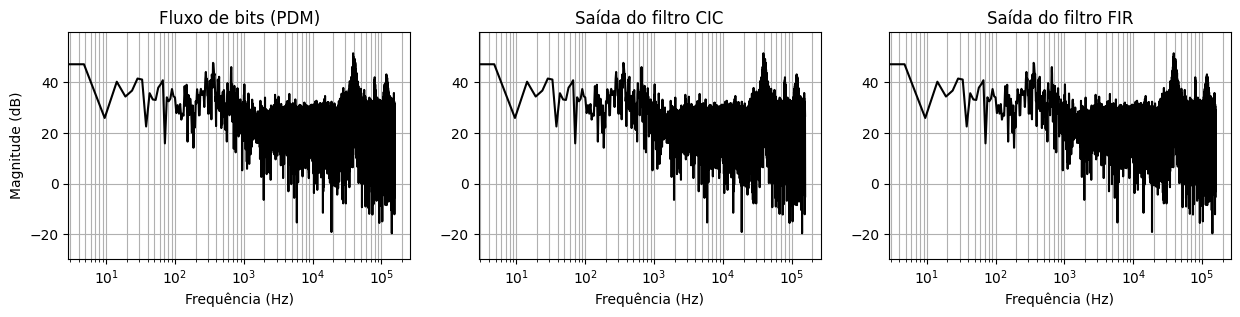

In [28]:
pdm_cic_fir_plot(data_pcm, data_pcm, data_pcm, fs_pcm, 1, lang='pt')

In [29]:
params = Params(tapers = [7, 11], Fs=fs_pcm, pad=0, fpass=[0, fs_pcm/2], trialave=0, err=[0, 0.05])
movingwin = [0.1, 0.01]
S, t, f = mtspecgramc(data_pcm.ravel(), movingwin, params)
S[:] = (S-np.min(S))/(np.max(S)-np.min(S))

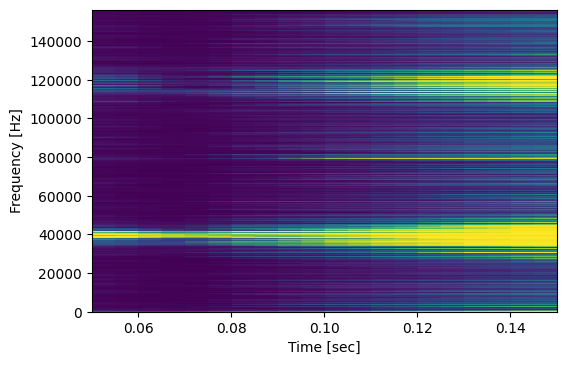

In [31]:
chunked_pcolormesh(t, f, S, v=[0, 0.5e-1])